<h1>Méthode Electre-Tri<h1>

ELECTRE est une famille de méthodes de surclassement. La relation **"$a$ surpasse $b$"** (notée $a > b$, $a\, S\, b$, ou $a \succ b$) signifie qu’il existe suffisamment d’éléments en faveur de l’affirmation selon laquelle la **solution $a$ est au moins aussi bonne que la solution $b$**, et qu’il n’existe pas d’arguments forts pour contredire cette affirmation.

# Données du projet

Dans le cadre de notre projet intitulé "Étude sur le confort d'été du bâtiment Léon Blum à Villefontaine", supposons qu'il existe vingt-quatre alternatives :
* S1 : G3, O1, V2 → Brise-soleil, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation mécanique nocturne
* S2 : G4, O1, V2 → Brise-soleil, Vitrage SageGlass Climaplus Blue No Tint, Ventilation mécanique nocturne
* S3 : G3, O1, V3 → Brise-soleil, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle nocturne
* S4 : G4, O1, V3 → Brise-soleil, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle nocturne
* S5 : G3, O1, V4 → Brise-soleil, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle complexe
* S6 : G4, O1, V4 → Brise-soleil, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle complexe
* S7 : G3, O1, V5 → Brise-soleil, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation nocturne mixte
* S8 : G4, O1, V5 → Brise-soleil, Vitrage SageGlass Climaplus Blue No Tint, Ventilation nocturne mixte
<br> <br>
* S9 : G3, O2, V2 → Casquette, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation mécanique nocturne
* S10 : G4, O2, V2 → Casquette, Vitrage SageGlass Climaplus Blue No Tint, Ventilation mécanique nocturne
* S11 : G3, O2, V3 → Casquette, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle nocturne
* S12 : G4, O2, V3 → Casquette, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle nocturne
* S13 : G3, O2, V4 → Casquette, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle complexe
* S14 : G4, O2, V4 → Casquette, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle complexe
* S15 : G3, O2, V5 → Casquette, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation nocturne mixte
* S16 : G4, O2, V5 → Casquette, Vitrage SageGlass Climaplus Blue No Tint, Ventilation nocturne mixte
<br> <br>
* S17 : G3, O3, V2 → Stores diffusants, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation mécanique nocturne
* S18 : G4, O3, V2 → Stores diffusants, Vitrage SageGlass Climaplus Blue No Tint, Ventilation mécanique nocturne
* S19 : G3, O3, V3 → Stores diffusants, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle nocturne
* S20 : G4, O3, V3 → Stores diffusants, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle nocturne
* S21 : G3, O3, V4 → Stores diffusants, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation naturelle complexe
* S22 : G4, O3, V4 → Stores diffusants, Vitrage SageGlass Climaplus Blue No Tint, Ventilation naturelle complexe
* S23 : G3, O3, V5 → Stores diffusants, Double-vitrage Dbl LoE Spec Sel Clr 6mm/13mm Arg, Ventilation nocturne mixte
* S24 : G4, O3, V5 → Stores diffusants, Vitrage SageGlass Climaplus Blue No Tint, Ventilation nocturne mixte

chacune associée à des coûts, des indices d'inconcort (PMV et heure d'inconfort).

L'objectif est de classer ces vingt-quatre alternatives en trois catégories (par exemple : mauvaise, acceptable, bonne) en fonction de leurs performances selon plusieurs critères : le coût, PMV et heure d'inconcort. Les catégories sont définies à partir de profils de référence équidistants, situés entre deux niveaux extrêmes.

Pour une explication détaillée des concepts, veuillez consulter le fichier : /explanation/electre_tri-b_explained.ipynb pour les definitions des concepts.
___

**Données :**

- Ensemble des critères :
    - Coût (€/m²) avec une pondération de w = 0.2
    - PMV avec une pondération de ω = 0.3 (valeur de -3 à 3)
    - Heure d'inconfort avec une pondération de ω = 0.3 (exprimée en $h$)
    - Autre (inconfort technologique) avec une pondération de ω = 0.2 (valeur de 0 à 1)
___

- Ensemble des alternatives $\{S_{i}\}$ :
(présentées précédemment)
___

- Une matrice $B = \{b_{j,k}\}$ du modèle de référence (ou catégories des limites) $b_j$ pour chaque critère $k$.

| Modèle de ref | Coût (€/m²) | PMV | Heure d'inconfort ($h$) |
|---------------|---------------------:|-------------:|-------------:|
| b1: Mauvais   | 200                 |   -0.58      | -0.21 | 
| b2: Bon       | 150                |   -0.15      | -0.05 |

Ces profils de base définissent les bornes inférieure et supérieure de cinq catégories équidistantes :

- __mauvais >__ : Alternatives moins performantes que le profil de base __b1__ (Mauvais).
- __(mauvais, bon)__: Alternatives situées entre deux profils de base __Mauvais__ et __Bon__.
- __mauvais <__: Alternatives surpassant significativement le profil __b2__ (Bon).
____

- Une matrice $T$ des seuils :
  - Seuil d'indifférence $q = \{q_k\}$, la plus grande différence de performance sur un critère que le décideur considère comme insignifiante;
  - Seuil de préférence $p = \{p_k\}$,  la plus petite différence de performance sur un critère que le décideur considère comme suffisamment significative pour préférer fortement une alternative à une autre;
  - Seuil de veto $v = \{v_k\}$, la différence maximale admissible sur un critère au-delà de laquelle une alternative ne peut surpasser une autre, quelles que soient ses performances sur les autres critères.

| Profil de seuil | Coût (€/m²) | PMV | Heure d'inconfort ($h$) |
|---------|---------------------:|------------:|-------------:|
| q       | 15                  | -0.02        | -0.006 |
| p       | 30                 | -0.07| -0.03 |
| v       | 80                 | -0.18       | -0.06 |

___

- Seuil de crédibilité $\lambda$ pour le surclassement : il s'agit du degré minimum de l'indice de crédibilité requis pour valider l'affirmation selon laquelle "la solution a surclasse le modèle de référence b" (valeur dans l'intervalle [0.5, 1], avec une valeur typique de 0.7).
____

Pour classer chaque solution $a_i ∈ A$ dans l'une des catégories $C_j ∈ C$, selon sa performance sur l'ensemble des critères $c_k$ en utilisant une classification optimiste et pessimiste, voici les étapes à suivre :

1) **Classification pessimiste** :
* Une solution $a_i$ est assignée à la meilleure catégorie $C_j$ si elle est suffisamment dominée par le profil de base supérieur $b_j$ selon les seuils de crédibilité ($\lambda$).
* Cela représente une approche prudente en considérant les limites inférieures de performance.

2) **Classification optimiste** :
* Une solution $a_i$ est assignée à la meilleure catégorie $C_j$ si elle surclasse le profil de base inférieur $b_j-1$ avec un indice de crédibilité acceptable ($\lambda$).
* Cela prend en compte une vision plus favorable des performances.

| Catégories   | Solutions                             |
|--------------|------------------------------------------|
| __Mauvais ≻__     | [Liste de solutions pire que **Mauvais**]     |
| __(Mauvais, Bon)__ | [Liste de solutions entre **Mauvais** et **Bon**] |
| __Bon ≺__     | [Liste de solutions meilleure que **Bon**]    |

____

# Procedure:
1. Importer le fichier de données contenant les performances des solutions, les modèles de référence, les seuils, et les pondérations.
3. Charger le fichier de données et résoudre le problème de tri à l’aide de la méthode ELECTRE Tri-B.
4. Définir un seuil de crédibilité.
5. Analyser et interpréter les résultats obtenus.
6. Représenter graphiquement les résultats pour visualiser la répartition des alternatives dans les différentes catégories.

In [1]:
"""
Append `src/` directory to `path`
"""
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)

# module_path = "C:\Users\helen\OneDrive\Documents\5GCU\PIRD\Resolution_Electri\ELECTRE_Tri-main\src"
# sys.path.append(os.path.abspath(module_path))

src_dir = os.path.join(project_root, 'src')
sys.path.append(src_dir)
print(sys.path)

['C:\\Users\\helen\\OneDrive - INSA Lyon\\Documents\\5GCU\\PIRD\\Resolution_Electri\\ELECTRI_TRI\\Projet', 'C:\\Users\\helen\\anaconda3\\python38.zip', 'C:\\Users\\helen\\anaconda3\\DLLs', 'C:\\Users\\helen\\anaconda3\\lib', 'C:\\Users\\helen\\anaconda3', '', 'C:\\Users\\helen\\anaconda3\\lib\\site-packages', 'C:\\Users\\helen\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\helen\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\helen\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\helen\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\helen\\.ipython', 'C:\\Users\\helen\\OneDrive - INSA Lyon\\Documents\\5GCU\\PIRD\\Resolution_Electri\\ELECTRI_TRI\\src']


In [2]:
import pandas as pd

import electre_tri as et

Type :
* Solution alternative: A; 
* Modèle de référence : B;
* Limites de la méthode Electre : T;
* Poids : ω;

In [3]:
data_file = "../data/Tableau_Projet.csv"
print("Données du projet")
pd.read_csv(data_file)

Données du projet


,Type,Indice,Coût total ou par m² (€/m²),PMV,Heure d'inconfort (h)
0,A,"S1 : G3, O1, V2",-180.000000,-0.738000,-0.269000
1,A,"S2 : G4, O1, V2",-250.000000,-0.714000,-0.265000
2,A,"S3 : G3, O1, V3",-300.000000,-0.737000,-0.269000
3,A,"S4 : G4, O1, V3",-250.000000,-0.711000,-0.265000
4,A,"S5 : G3, O1, V4",-100.000000,-0.931000,-0.306000
5,A,"S6 : G4, O1, V4",-150.000000,-0.898000,-0.301000
6,A,"S7 : G3, O1, V5",-250.000000,-0.849000,-0.304000
7,A,"S8 : G4, O1, V5",-300.000000,-0.823000,-0.297000
8,A,"S9 : G3, O2, V2",-120.000000,-0.759000,-0.275000
9,A,"S10 : G4, O2, V2",-190.000000,-0.725000,-0.268000


# Résolution de problème

In [4]:
# Problem statement
# data_file = "../data/Tableau_Projet.csv"
credibility_threshold = 0.7

# Problem solving
A, B, T, w = et.read_electre_tri_base(data_file)
optimistic, pessimistic = et.electre_tri_b(A, B, T, w, credibility_threshold)

# Résultats numériques

In [5]:
# Optimistic sorting
opti_sort = et.sort(optimistic)
print('Optimistic sorting')
opti_sort.to_frame(name="alternatives").rename_axis("categories")

Optimistic sorting


,alternatives
categories,
Mauvais ≻,"[S1 : G3, O1, V2 , S2 : G4, O1, V2 , S3 : G3, ..."
"(Mauvais, Bon)","[S6 : G4, O1, V4 , S9 : G3, O2, V2 , S12 : G4,..."
Bon ≺,"[S13 : G3, O2, V4 ]"


In [6]:
# Pessimistic sorting
pessi_sort = et.sort(pessimistic)
print('Pessimistic sorting')
pessi_sort.to_frame(name="alternatives").rename_axis("categories")

Pessimistic sorting


,alternatives
categories,
Mauvais ≻,"[S1 : G3, O1, V2 , S2 : G4, O1, V2 , S3 : G3, ..."
"(Mauvais, Bon)",[]
Bon ≺,[]


# Résultats graphiques

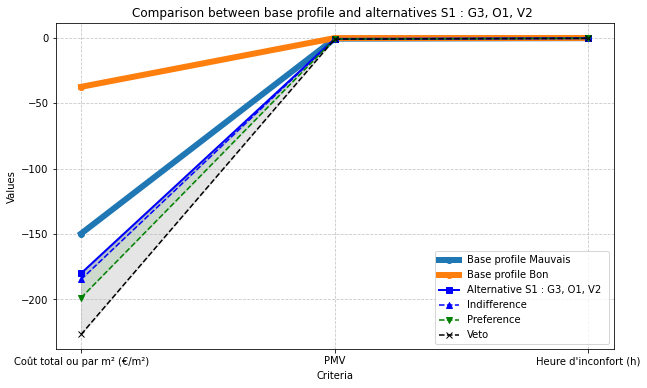

In [7]:
et.plot_base_profiles_vs_alternative(B, A.iloc[0], T)

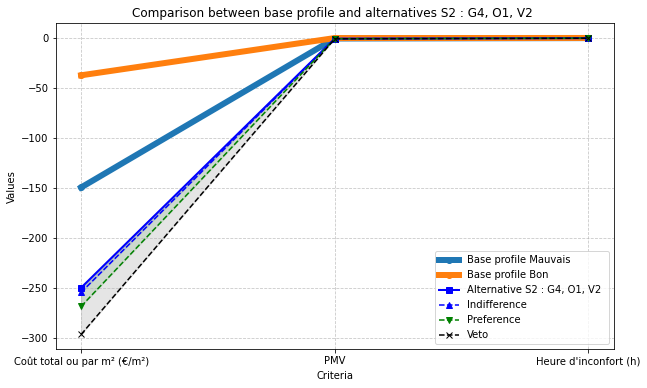

In [8]:
et.plot_base_profiles_vs_alternative(B, A.iloc[1], T)

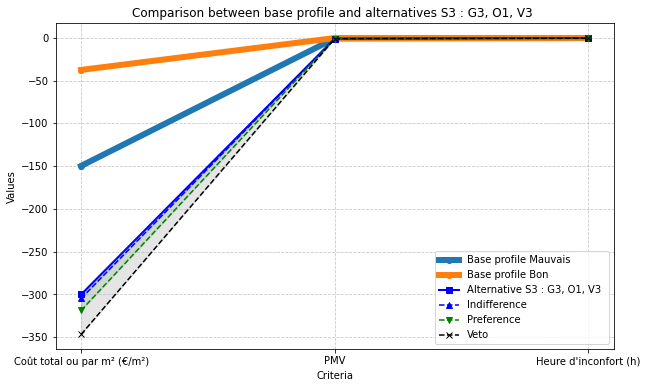

In [9]:
et.plot_base_profiles_vs_alternative(B, A.iloc[2], T)

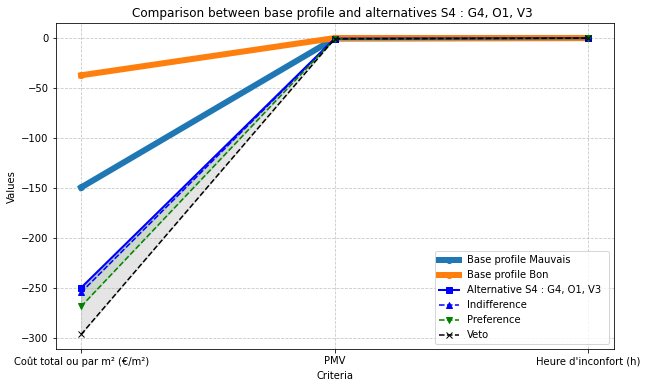

In [10]:
et.plot_base_profiles_vs_alternative(B, A.iloc[3], T)

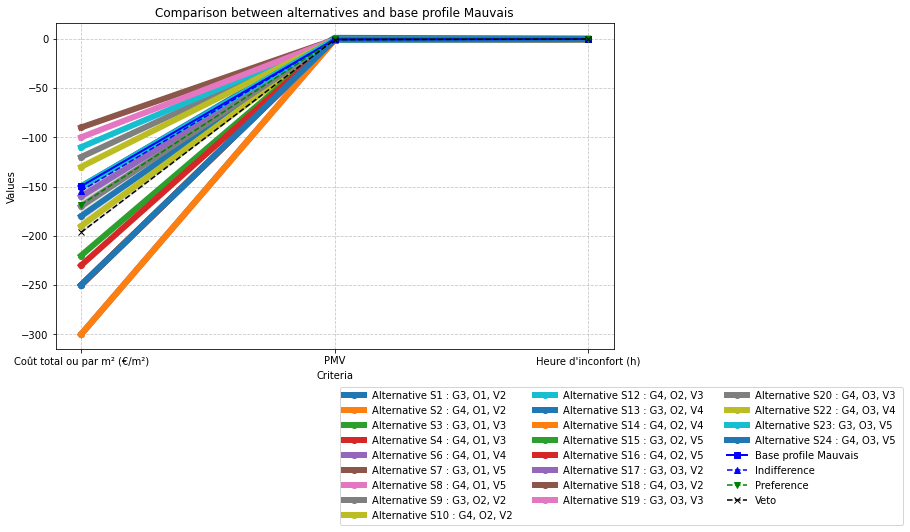

In [11]:
et.plot_alternatives_vs_base_profile(A, B.loc['Mauvais'], T)

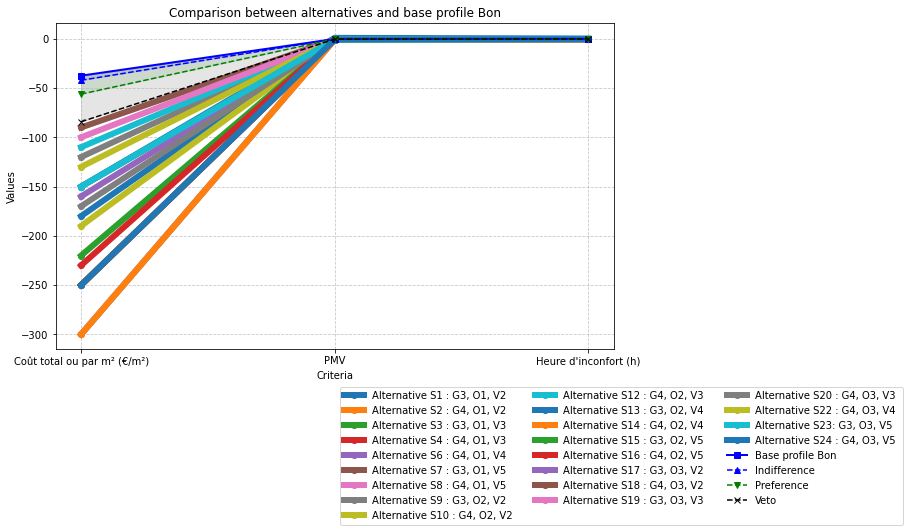

In [12]:
et.plot_alternatives_vs_base_profile(A, B.loc['Bon'], T)